# STOCK ANALYSIS WITH PYTHON
<br>
This is the first real project after introduction for familiarize using yahoo finance library and API. In this project is inspired by the following link:
<br><br>
inspiration : https://www.ferventlearning.com/how-to-calculate-stock-returns/
<br><br>
The goals is to clean the data and plot the return based on the given formula. Later on this return will be plotted with line graph.

In [1]:
#Library Declaration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

## 1) Data Import
<br>
In this project we will analyze based on the daily volume activity, stock returns, as well as the trends for the stock GOTO in indonesia Stock exchange. As for the analysis we will use GOTO.JK ticker in yfinance library.

In [2]:
#Importing Basic Dataset
stock_code = "GOTO.JK"
stock = yf.Ticker(stock_code)

From above line we have imported GOTO.JK stock which can be seen as follow :

In [3]:
 df = stock.history(period = 'max',interval= '1d')
 df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-11 00:00:00+07:00,400.0,416.0,372.0,382.0,9410897000,0.0,0.0
2022-04-12 00:00:00+07:00,422.0,442.0,360.0,370.0,3887331000,0.0,0.0
2022-04-13 00:00:00+07:00,370.0,380.0,360.0,374.0,3262811400,0.0,0.0
2022-04-14 00:00:00+07:00,374.0,382.0,374.0,376.0,3675981900,0.0,0.0
2022-04-18 00:00:00+07:00,376.0,380.0,370.0,378.0,2660312700,0.0,0.0


## 2) Data Cleaning
<br>
From the dataset we should selecting the data which is date columns and close columns and later on creating the new columns for calculating the returns on daily basis as follows.

In [4]:
df = df[["Close"]]
df.head()

,Close
Date,
2022-04-11 00:00:00+07:00,382.0
2022-04-12 00:00:00+07:00,370.0
2022-04-13 00:00:00+07:00,374.0
2022-04-14 00:00:00+07:00,376.0
2022-04-18 00:00:00+07:00,378.0


In [5]:
df["Close"].isnull().sum()
#From the above statement we know that there is no missing data from the data set now proceed with the next step

0

We only need to select close as **Date columns act as the index** from the dataframe.

In [6]:
df["Close_Prev"] = df["Close"].shift(1)
df.head()

,Close,Close_Prev
Date,,
2022-04-11 00:00:00+07:00,382.0,NaN
2022-04-12 00:00:00+07:00,370.0,382.0
2022-04-13 00:00:00+07:00,374.0,370.0
2022-04-14 00:00:00+07:00,376.0,374.0
2022-04-18 00:00:00+07:00,378.0,376.0


In [9]:
df["return"]  = ((df["Close"]/df["Close_Prev"])-1)*100
df.head()

,Close,Close_Prev,return
Date,,,
2022-04-11 00:00:00+07:00,382.0,NaN,NaN
2022-04-12 00:00:00+07:00,370.0,382.0,-3.141361
2022-04-13 00:00:00+07:00,374.0,370.0,1.081081
2022-04-14 00:00:00+07:00,376.0,374.0,0.534759
2022-04-18 00:00:00+07:00,378.0,376.0,0.531915


In [10]:
df["Return_auto"] = df["Close"].pct_change(1)
df.head()

,Close,Close_Prev,return,Return_auto
Date,,,,
2022-04-11 00:00:00+07:00,382.0,NaN,NaN,NaN
2022-04-12 00:00:00+07:00,370.0,382.0,-3.141361,-0.031414
2022-04-13 00:00:00+07:00,374.0,370.0,1.081081,0.010811
2022-04-14 00:00:00+07:00,376.0,374.0,0.534759,0.005348
2022-04-18 00:00:00+07:00,378.0,376.0,0.531915,0.005319


<AxesSubplot:xlabel='Date'>

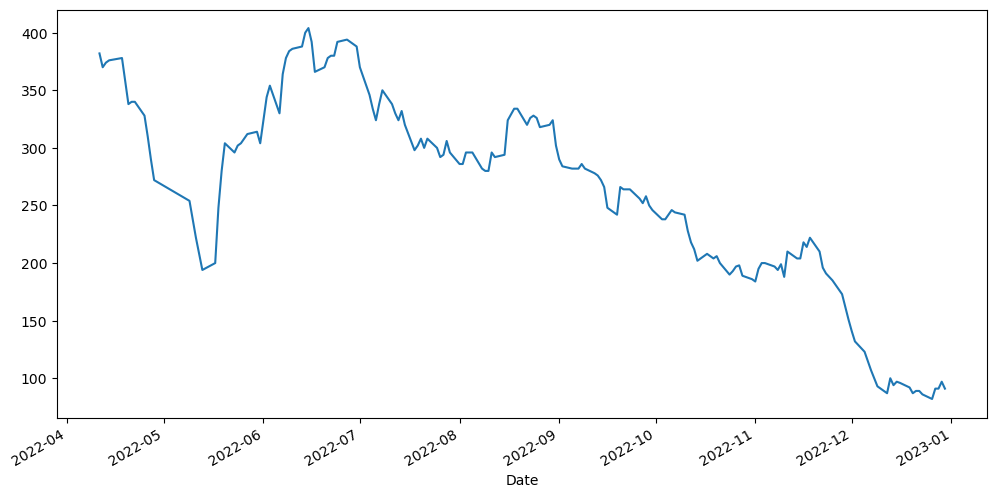

In [11]:
df.Close.plot(figsize =  (12,6))

<AxesSubplot:xlabel='Date'>

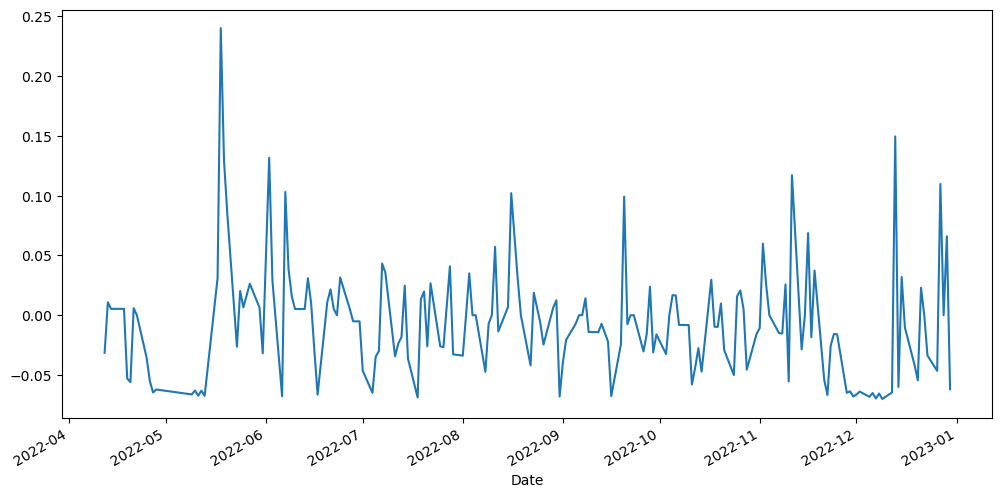

In [12]:
df.Return_auto.plot(figsize = (12,6))